In [52]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")
import numpy as np

Setup Complete


Возьмем данные из результатов, полученных из эксперемнтов по пылению уголной наспыки. Данные представлены в виде солбца времени и столбцом разных крупностей испытуемой пыли. И отображены показатели концентрации этой пыли в эксперемнтальном бункере.

In [4]:
ssl = 'C:/Users/nout/Desktop/попытка номер 5/Уроки/GitHub/Python-Maksim/Data/Dataset/TEST_5_005.csv'
df = pd.read_csv(ssl, index_col='Elapsed Time [s]')
del df['Alarms']
del df['Errors']
df.head()

,PM1 [mg/m3],PM2.5 [mg/m3],PM4 [mg/m3],PM10 [mg/m3],TOTAL [mg/m3]
Elapsed Time [s],,,,,
1,0.049,0.053,0.079,0.312,0.436
2,0.042,0.048,0.075,0.322,0.450
3,0.044,0.052,0.092,0.449,0.592
4,0.014,0.018,0.034,0.191,0.240
5,0.019,0.020,0.022,0.035,0.035


Были уадлены ненужные столбцы и индесу был присвоен столбец со временем.
Далее найдены средние значения по размерам пыли их концентрации.

In [5]:
srz_pm1 = df['PM1 [mg/m3]'].sum() / df['PM1 [mg/m3]'].__len__()
srz_pm25 = df['PM2.5 [mg/m3]'].sum() / df['PM2.5 [mg/m3]'].__len__()
srz_pm4 = df['PM4 [mg/m3]'].sum() / df['PM4 [mg/m3]'].__len__()
srz_pm10 = df['PM10 [mg/m3]'].sum() / df['PM10 [mg/m3]'].__len__()

Затем присвоины проверки на непревышение этих средних значений в каждом столбце соответственно своиму ср.зн. от размера частиц. Это условие было сделано для нерассматривания ненужных данных.

In [6]:
normal_zn1 = df['PM1 [mg/m3]'] <= srz_pm1
normal_zn25 = df['PM2.5 [mg/m3]'] <= srz_pm25
normal_zn4 = df['PM4 [mg/m3]'] <= srz_pm4
normal_zn10 = df['PM10 [mg/m3]'] <= srz_pm10

Построин граффик времени от концентрации пыли с условиями непревышения средних значений.

<Axes: xlabel='Elapsed Time [s]', ylabel='PM1 [mg/m3]'>

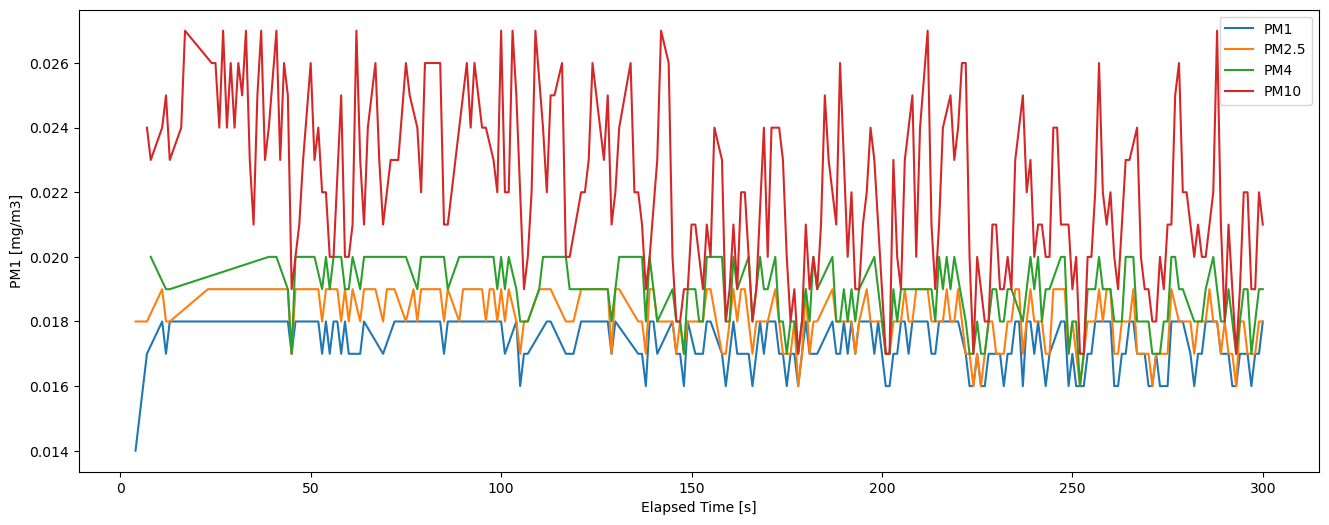

In [7]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df['PM1 [mg/m3]'][normal_zn1], label='PM1')
sns.lineplot(data=df['PM2.5 [mg/m3]'][normal_zn25], label='PM2.5')
sns.lineplot(data=df['PM4 [mg/m3]'][normal_zn4], label='PM4')
sns.lineplot(data=df['PM10 [mg/m3]'][normal_zn10], label='PM10')

<Axes: xlabel='Elapsed Time [s]', ylabel='PM10 [mg/m3]'>

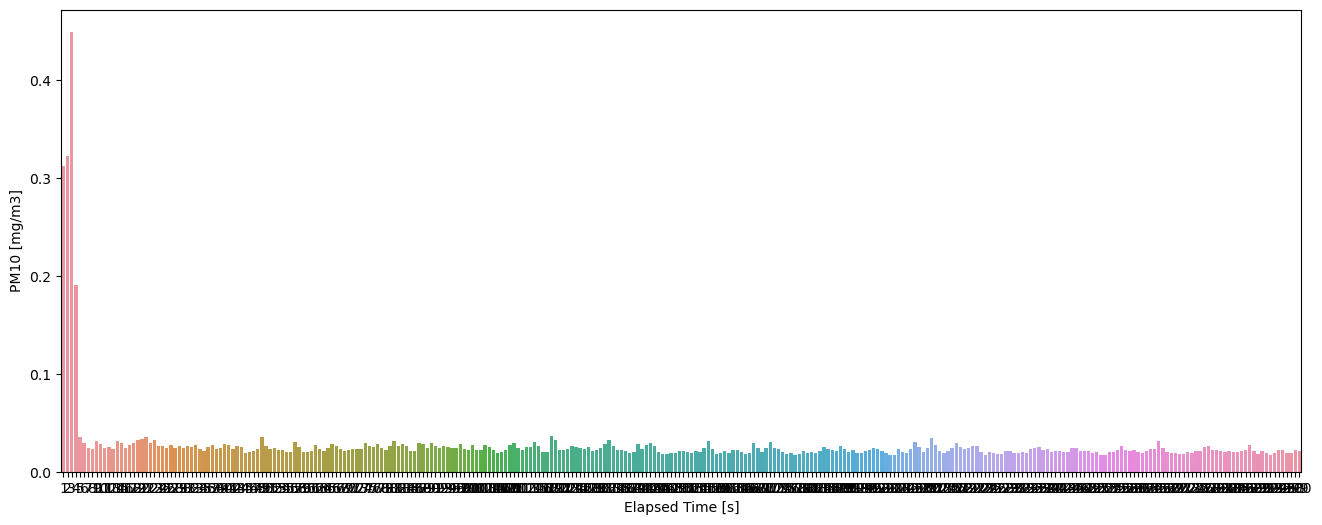

In [8]:
plt.figure(figsize=(16,6))
sns.barplot(x=df.index, y=df['PM10 [mg/m3]'])

In [9]:

df3 = df.loc[0:301:20]
df3

,PM1 [mg/m3],PM2.5 [mg/m3],PM4 [mg/m3],PM10 [mg/m3],TOTAL [mg/m3]
Elapsed Time [s],,,,,
1,0.049,0.053,0.079,0.312,0.436
21,0.024,0.025,0.026,0.035,0.056
41,0.018,0.019,0.020,0.027,0.027
61,0.019,0.019,0.020,0.021,0.021
81,0.023,0.024,0.026,0.031,0.031
101,0.017,0.018,0.019,0.022,0.022
121,0.018,0.019,0.021,0.022,0.022
141,0.017,0.018,0.018,0.023,0.023
161,0.018,0.019,0.020,0.021,0.021


<Axes: ylabel='Elapsed Time [s]'>

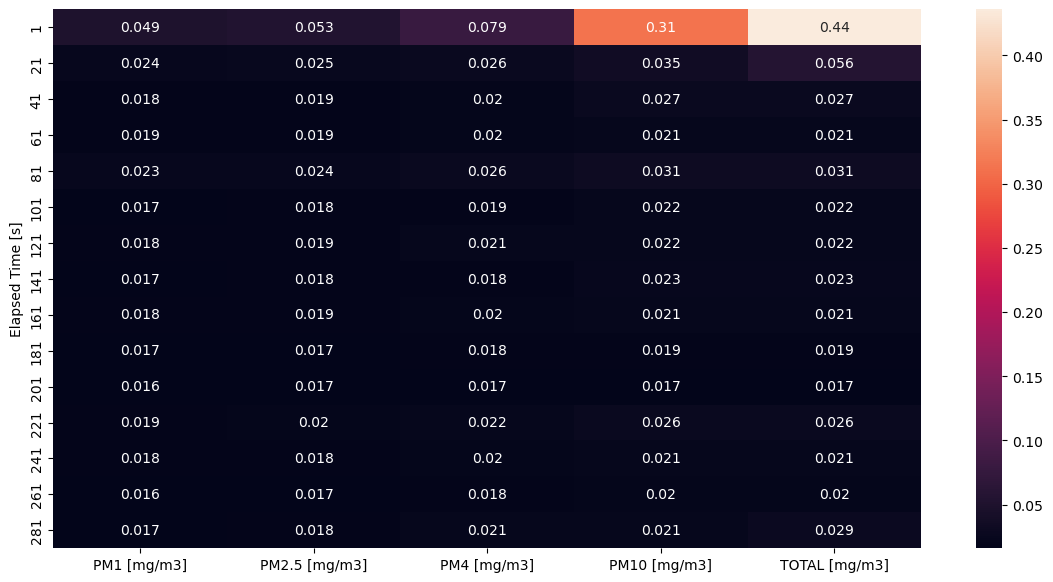

In [10]:
plt.figure(figsize=(14,7))
sns.heatmap(data=df3, annot=True)

<Axes: xlabel='Elapsed Time [s]', ylabel='PM2.5 [mg/m3]'>

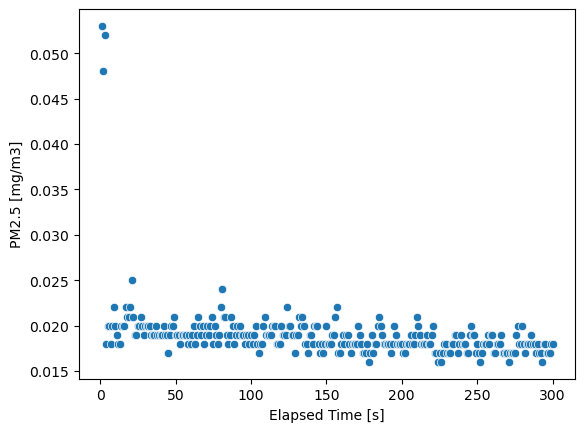

In [11]:
sns.scatterplot(x=df.index, y=df['PM2.5 [mg/m3]'])

<Axes: xlabel='Elapsed Time [s]', ylabel='PM2.5 [mg/m3]'>

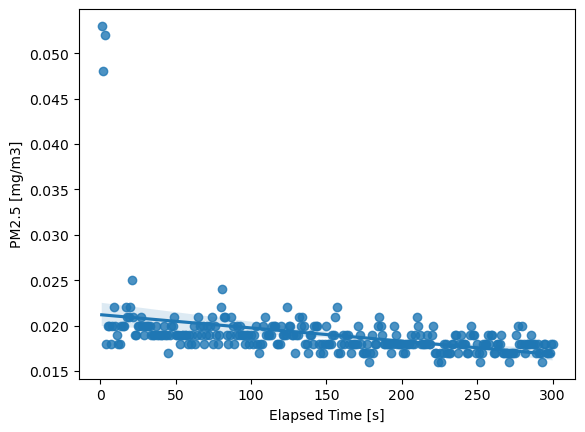

In [12]:
sns.regplot(x=df.index, y=df['PM2.5 [mg/m3]'])

In [13]:
bolsh_pol = df['PM2.5 [mg/m3]'] > (df['PM2.5 [mg/m3]'].sum() / df['PM2.5 [mg/m3]'].__len__())
bolsh_pol.head()

Elapsed Time [s]
1     True
2     True
3     True
4    False
5     True
Name: PM2.5 [mg/m3], dtype: bool

<Axes: xlabel='Elapsed Time [s]', ylabel='PM2.5 [mg/m3]'>

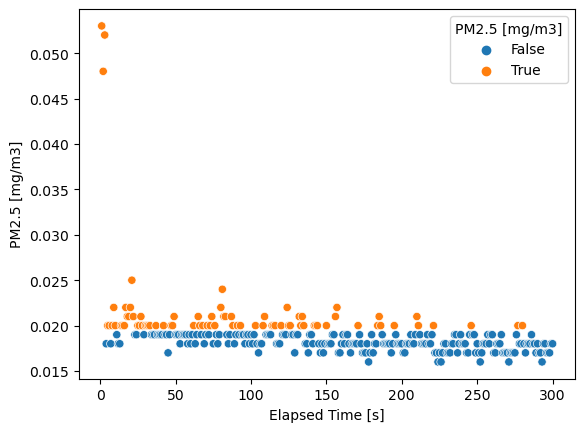

In [14]:
sns.scatterplot(x=df.index, y=df['PM2.5 [mg/m3]'], hue=bolsh_pol)

In [15]:
df2 = pd.read_csv(ssl)
df2['sr2.5'] = df2['PM2.5 [mg/m3]'] > (df['PM2.5 [mg/m3]'].sum() / df['PM2.5 [mg/m3]'].__len__())
df2.head()


,Elapsed Time [s],PM1 [mg/m3],PM2.5 [mg/m3],PM4 [mg/m3],PM10 [mg/m3],TOTAL [mg/m3],Alarms,Errors,sr2.5
0,1,0.049,0.053,0.079,0.312,0.436,NaN,NaN,True
1,2,0.042,0.048,0.075,0.322,0.450,NaN,NaN,True
2,3,0.044,0.052,0.092,0.449,0.592,NaN,NaN,True
3,4,0.014,0.018,0.034,0.191,0.240,NaN,NaN,False
4,5,0.019,0.020,0.022,0.035,0.035,NaN,NaN,True


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


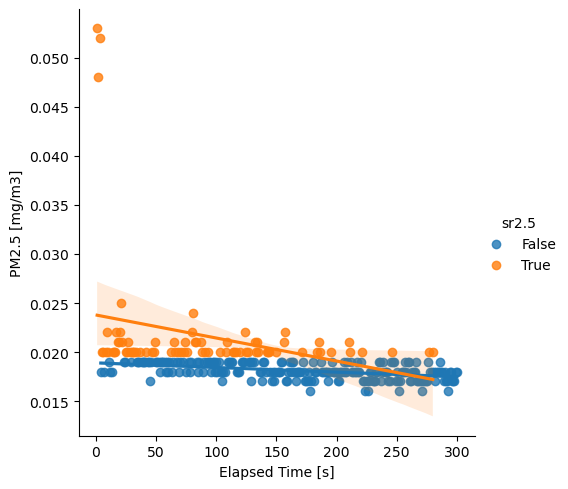

In [16]:
sns.lmplot(data=df2, x='Elapsed Time [s]', y='PM2.5 [mg/m3]', hue='sr2.5')

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 32.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='sr2.5', ylabel='PM2.5 [mg/m3]'>

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 61.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 29.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


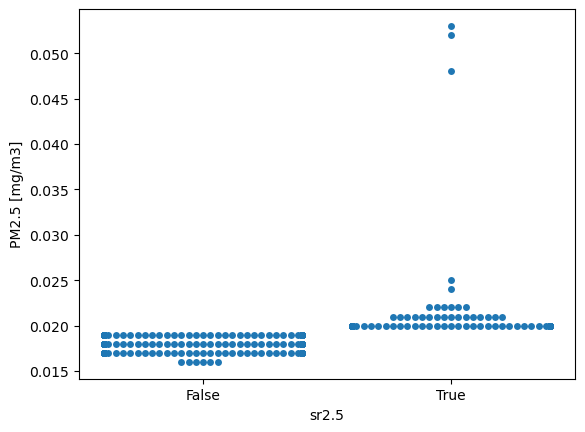

In [17]:
sns.swarmplot(y=df2['PM2.5 [mg/m3]'], x=df2['sr2.5'])

In [18]:
#df.sort_values(by='PM2.5 [mg/m3]')
df.loc[df['PM1 [mg/m3]'] == 0.016].head(5)

,PM1 [mg/m3],PM2.5 [mg/m3],PM4 [mg/m3],PM10 [mg/m3],TOTAL [mg/m3]
Elapsed Time [s],,,,,
105,0.016,0.017,0.018,0.022,0.022
138,0.016,0.017,0.018,0.019,0.019
148,0.016,0.017,0.017,0.019,0.019
159,0.016,0.017,0.018,0.018,0.018
166,0.016,0.017,0.018,0.018,0.018


In [41]:
df3 = pd.read_csv(ssl,  index_col='Elapsed Time [s]')
del df3['Alarms']
del df3['Errors']

df3.head()

,PM1 [mg/m3],PM2.5 [mg/m3],PM4 [mg/m3],PM10 [mg/m3],TOTAL [mg/m3]
Elapsed Time [s],,,,,
1,0.049,0.053,0.079,0.312,0.436
2,0.042,0.048,0.075,0.322,0.450
3,0.044,0.052,0.092,0.449,0.592
4,0.014,0.018,0.034,0.191,0.240
5,0.019,0.020,0.022,0.035,0.035


In [42]:
df3 = df3[df3 <= srz_pm10 * 1.2]

df3.head()

,PM1 [mg/m3],PM2.5 [mg/m3],PM4 [mg/m3],PM10 [mg/m3],TOTAL [mg/m3]
Elapsed Time [s],,,,,
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,0.014,0.018,NaN,NaN,NaN
5,0.019,0.020,0.022,NaN,NaN


<Axes: xlabel='Elapsed Time [s]', ylabel='PM10 [mg/m3]'>

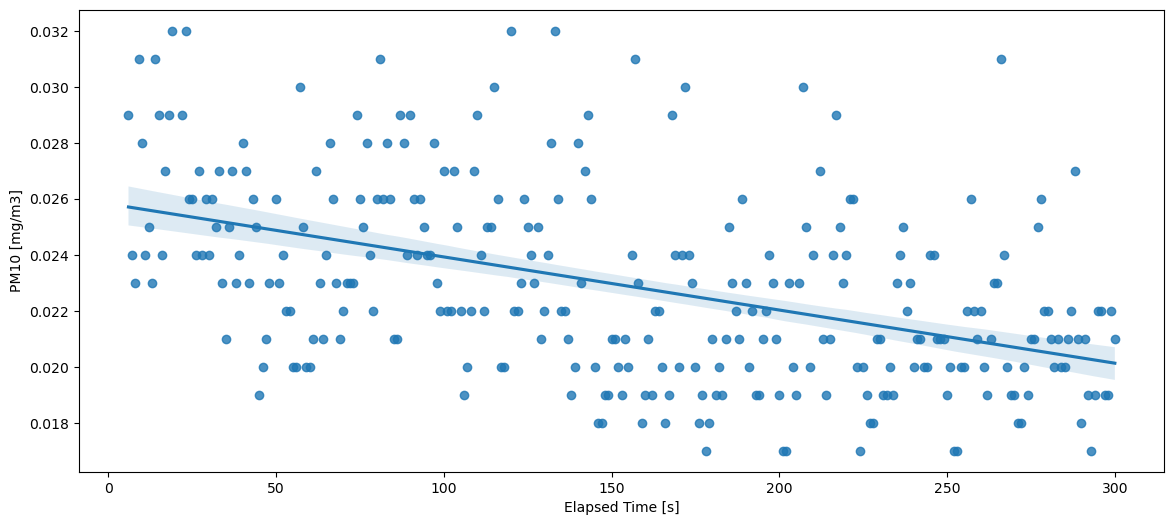

In [46]:
plt.figure(figsize=(14,6))
sns.regplot(x=df2['Elapsed Time [s]'],y=df3['PM10 [mg/m3]'])

In [70]:

df3.ffill()
df3

,PM1 [mg/m3],PM2.5 [mg/m3],PM4 [mg/m3],PM10 [mg/m3],TOTAL [mg/m3]
Elapsed Time [s],,,,,
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,0.014,0.018,NaN,NaN,NaN
5,0.019,0.020,0.022,NaN,NaN
...,...,...,...,...,...
296,0.017,0.017,0.019,0.022,0.022
297,0.016,0.017,0.017,0.019,0.019
298,0.017,0.017,0.018,0.019,0.019


<Axes: ylabel='Count'>

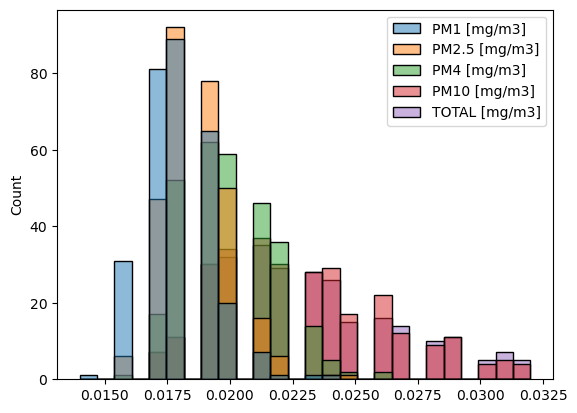

In [51]:
sns.histplot(data=df3)

<Axes: ylabel='Density'>

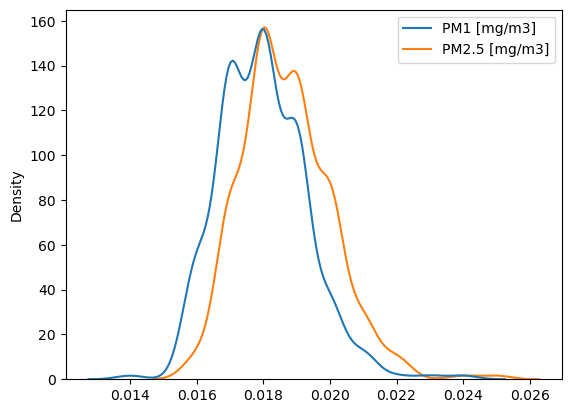

In [72]:
sns.kdeplot(data=df3[['PM1 [mg/m3]', 'PM2.5 [mg/m3]']])

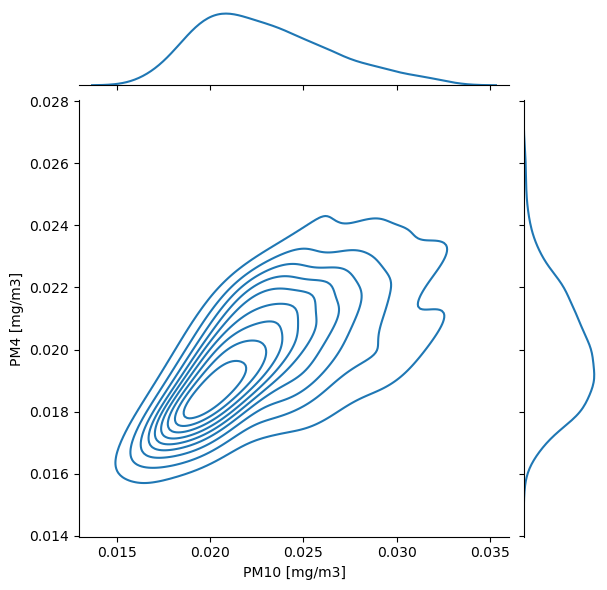

In [76]:
sns.jointplot(x=df3['PM10 [mg/m3]'], y=df3['PM4 [mg/m3]'], kind='kde')